In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset = pd.read_csv(r"C:\\Users\\Ankit\\Downloads\\HousingDataSet_2.csv")
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,Married,Gender,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,No,M,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,Yes,F,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,No,F,242,17.8,392.83,4.03,34.7


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   Married  506 non-null    object 
 10  Gender   474 non-null    object 
 11  TAX      506 non-null    int64  
 12  PTRATIO  506 non-null    float64
 13  B        506 non-null    float64
 14  LSTAT    486 non-null    float64
 15  MEDV     506 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory usage: 63.4+ KB


In [13]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
Married     0
Gender     32
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [15]:
# to check a specific column

dataset['RAD'].value_counts()

RAD
24    160
4     100
5      98
3      56
2      23
8      22
6      21
1      17
7       9
Name: count, dtype: int64

### Filling  null values

In [12]:
dataset['RAD'].fillna(dataset['RAD'].mode()[0], inplace = True)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2395673219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RAD'].fillna(dataset['RAD'].mode()[0], inplace = True)


### Replacing 3+ with 3

In [16]:
dataset['RAD'].replace('3+', '3', inplace = True)   # data Type still remains Object type

### Changing Data type

In [18]:
dataset['RAD'] = dataset['RAD'].astype('int64')

# Function Transformation

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2216634267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B'])


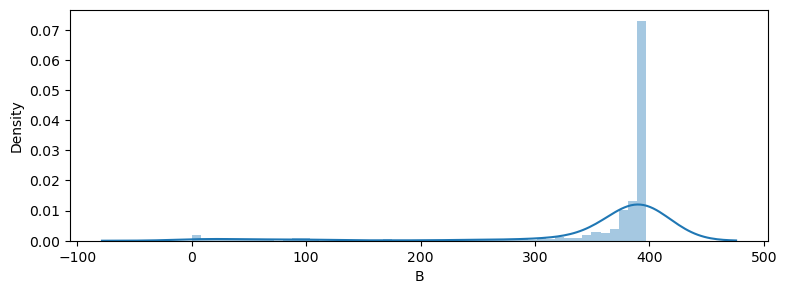

In [21]:
plt.figure(figsize=(9,3))
sns.distplot(dataset['B'])
plt.show()

# outlier remover with IQR method

In [25]:
q1 = dataset['B'].quantile(0.25)
q3 = dataset['B'].quantile(0.75)
iqr = q3-q1

In [26]:
min_r = q1 - (1.5*iqr)
max_r = q3 + (1.5*iqr)
min_r, max_r

(344.10624999999993, 427.49625000000003)

In [32]:
dataset = dataset[dataset['B']<=min_r]

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2216634267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B'])


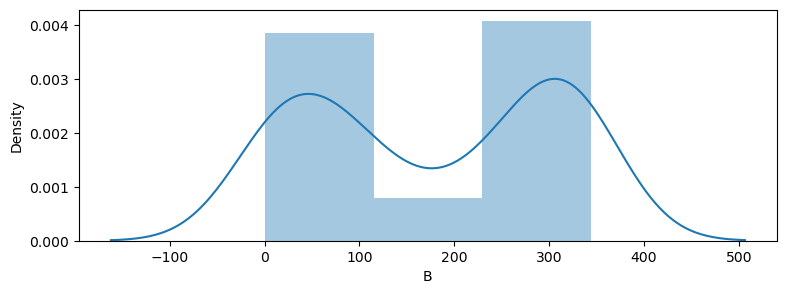

In [33]:
plt.figure(figsize=(9,3))
sns.distplot(dataset['B'])
plt.show()

### as we can't generate a Normal Distribution curve. We'll use Function Transformation

In [34]:
from sklearn.preprocessing import FunctionTransformer

In [36]:
ft = FunctionTransformer(func=np.log1p)

In [37]:
ft.fit(dataset[['B']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [39]:
dataset['B_tf'] = ft.transform(dataset[['B']])

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2340331292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['B_tf'] = ft.transform(dataset[['B']])


C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2052037256.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B'])
C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2052037256.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B_tf'])


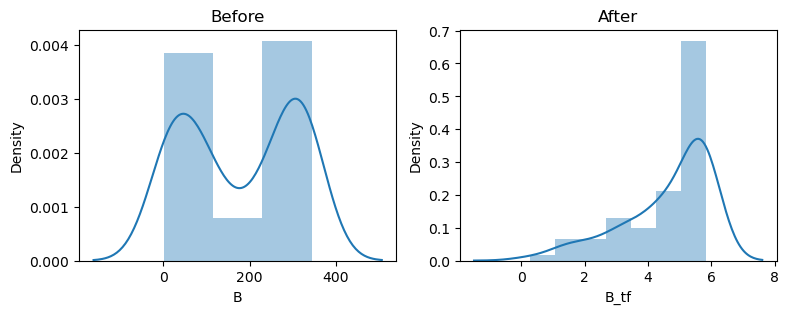

In [44]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
sns.distplot(dataset['B'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(dataset['B_tf'])
plt.title('After')

plt.show()

# Use of Function Transformer:
### When there are some very imp data in outlier part and can't be removed then transformed into Log to get a 'Normal Dist Curve'

### Not necessarily Log it can be any other function as well. GOAL = make Normal Dist Curve
example:

In [47]:
ft1 = FunctionTransformer(func=lambda x: x**2 )
ft1.fit(dataset[['B']])
dataset['B_tf1'] = ft1.transform(dataset[['B']])

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\3914204390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['B_tf1'] = ft1.transform(dataset[['B']])


C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2917490963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B'])
C:\Users\Ankit\AppData\Local\Temp\ipykernel_16020\2917490963.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['B_tf1'])


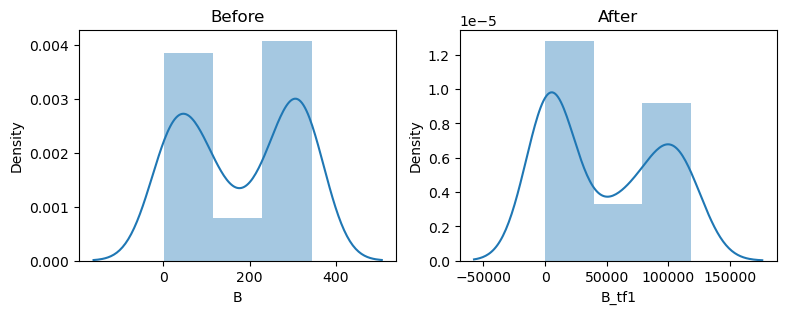

In [48]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
sns.distplot(dataset['B'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(dataset['B_tf1'])
plt.title('After')

plt.show()